In [2]:
import pandas as pd
import numpy as np
import os
import bite

# Data

### create CSV data files

In [2]:
# create custom csv market data from raw EPEX data files in UTC time format
# start and end dates dicate which raw files are lodaded.
# output csv of date (d) will have all orders submitted on day d for any product.

parser = bite.Data()
epex_path = "/Users/schaudav/Library/CloudStorage/Dropbox/project_1/EPEXSPOT DE/Intraday Continuous/Orders/"
save_path = "/Users/schaudav/Library/CloudStorage/Dropbox/project_1/intranight/data/singleDays/csvs_testNew_utc/"
parser.parse_market_data("2021-01-01", "2021-01-05", epex_path, save_path, verbose=True)

Currently loading and saving date 2021-01-05 ... : 100%|██████████| 5/5 [01:31<00:00, 18.39s/it]


Writing CSV data completed.


### create binary data files

In [3]:
# get all csv files we want to make binary data from and save their full path as a list
csv_files = os.listdir(save_path)
csv_files = [f for f in csv_files if f.endswith(".csv")]
csv_files = [save_path + f for f in csv_files]
csv_files.sort()

binary_save_path = "/Users/schaudav/Library/CloudStorage/Dropbox/project_1/intranight/data/singleDays/bins_testNew_utc/"

# create binary data from csv files
parser.create_bins_from_csv(csv_files, binary_save_path, verbose=True)

Currently saving binary orderbook_2021-01-05.bin ... : 100%|██████████| 5/5 [00:28<00:00,  5.66s/it]


Writing Binaries completed.


# Simulation

### export price-vol maps

In [11]:
params = {
    "tec_delay": 0, # ms
    "fixed_solve_time": 0, # ms
    "solve_frequency": 0.0, # min
}

# print all attributes of bite
# print(dir(bite))

start_date = pd.Timestamp("2021-01-01 00:00:00", tz="Europe/Berlin")
end_date = pd.Timestamp("2021-01-03 00:00:00", tz="Europe/Berlin")

ob_path = "/Users/schaudav/Library/CloudStorage/Dropbox/project_1/intranight/data/singleDays/bins_brandNew_utc/"

sim = bite.Simulation(start_date, end_date, **params)

lob_paths = sim.get_data_bins_for_each_day(ob_path, start_date, end_date)

print("Number of files to be read:", len(lob_paths))
print()

VOLS = np.array([-10, -5, -1, 0, 1, 5, 10]) # in MWh
FREQ = 30 # seconds

for i, path in enumerate(lob_paths):
    sim.add_bin_to_orderqueue(path)
    vol_price_list = sim.return_vol_price_pairs(i == len(lob_paths) - 1, FREQ, VOLS)
    print(f"Finished running orders of day "+path.split("/")[-1], flush=True)

    display(vol_price_list)

Number of files to be read: 3

Finished running orders of day orderbook_2020-12-31.bin


,current_time,delivery_hour,volume,price_full,worst_accepted_price
0,2020-12-31 23:00:30.303000+00:00,2021-01-01 00:00:00+00:00,-10.0,422.280,42.00
1,2020-12-31 23:00:30.303000+00:00,2021-01-01 00:00:00+00:00,-5.0,212.268,42.02
2,2020-12-31 23:00:30.303000+00:00,2021-01-01 00:00:00+00:00,-1.0,42.700,42.70
3,2020-12-31 23:00:30.303000+00:00,2021-01-01 00:00:00+00:00,1.0,-51.000,-51.00
4,2020-12-31 23:00:30.303000+00:00,2021-01-01 00:00:00+00:00,5.0,-298.020,-64.50
...,...,...,...,...,...
15409,2020-12-31 23:59:56.323000+00:00,2021-01-01 22:00:00+00:00,-5.0,251.130,49.05
15410,2020-12-31 23:59:56.323000+00:00,2021-01-01 22:00:00+00:00,-1.0,50.730,50.73
15411,2020-12-31 23:59:56.323000+00:00,2021-01-01 22:00:00+00:00,1.0,-52.902,-57.69
15412,2020-12-31 23:59:56.323000+00:00,2021-01-01 22:00:00+00:00,5.0,-283.662,-57.69


Finished running orders of day orderbook_2021-01-01.bin


,current_time,delivery_hour,volume,price_full,worst_accepted_price
0,2021-01-01 00:00:26.506000+00:00,2021-01-01 01:00:00+00:00,-10.0,482.415,48.00
1,2021-01-01 00:00:26.506000+00:00,2021-01-01 01:00:00+00:00,-5.0,242.415,48.00
2,2021-01-01 00:00:26.506000+00:00,2021-01-01 01:00:00+00:00,-1.0,49.715,48.60
3,2021-01-01 00:00:26.506000+00:00,2021-01-01 01:00:00+00:00,1.0,-51.060,-51.06
4,2021-01-01 00:00:26.506000+00:00,2021-01-01 01:00:00+00:00,5.0,-257.180,-52.00
...,...,...,...,...,...
342037,2021-01-01 23:59:41.939000+00:00,2021-01-02 22:00:00+00:00,-5.0,237.184,47.36
342038,2021-01-01 23:59:41.939000+00:00,2021-01-02 22:00:00+00:00,-1.0,47.600,47.60
342039,2021-01-01 23:59:41.939000+00:00,2021-01-02 22:00:00+00:00,1.0,-47.650,-47.65
342040,2021-01-01 23:59:41.939000+00:00,2021-01-02 22:00:00+00:00,5.0,-240.280,-51.40


Finished running orders of day orderbook_2021-01-02.bin


,current_time,delivery_hour,volume,price_full,worst_accepted_price
0,2021-01-02 00:00:11.944000+00:00,2021-01-02 01:00:00+00:00,-10.0,417.500,41.75
1,2021-01-02 00:00:11.944000+00:00,2021-01-02 01:00:00+00:00,-5.0,208.750,41.75
2,2021-01-02 00:00:11.944000+00:00,2021-01-02 01:00:00+00:00,-1.0,41.750,41.75
3,2021-01-02 00:00:11.944000+00:00,2021-01-02 01:00:00+00:00,1.0,-42.160,-42.40
4,2021-01-02 00:00:11.944000+00:00,2021-01-02 01:00:00+00:00,5.0,-211.862,-42.46
...,...,...,...,...,...
172561,2021-01-02 21:29:37.913000+00:00,2021-01-02 22:00:00+00:00,-5.0,189.973,37.71
172562,2021-01-02 21:29:37.913000+00:00,2021-01-02 22:00:00+00:00,-1.0,38.090,38.09
172563,2021-01-02 21:29:37.913000+00:00,2021-01-02 22:00:00+00:00,1.0,-38.590,-38.97
172564,2021-01-02 21:29:37.913000+00:00,2021-01-02 22:00:00+00:00,5.0,-194.575,-39.00


### no forecasts

In [3]:
params = {
    "storage_max": 10.0, # MWh
    "lin_deg_cost": 4.0, # €/MWh
    "loss_in": 0.95, # injection loss
    "loss_out": 0.95, # withdrawal loss
    "trading_fee": 0.09, # €/MWh
    "num_stor_states": 11,
    "tec_delay": 0, # ms
    "fixed_solve_time": 0, # ms
    "solve_frequency": 1.0, # min
    "withdraw_max": 5.0, # MW, withdrawal from the battery, we sell
    "inject_max": 5.0, # MW, injection into the battery, we buy
    "forecast_horizon_start": 10 * 60, # min
    "forecast_horizon_end": 75, # min
}

# print all attributes of bite
# print(dir(bite))

start_date = pd.Timestamp("2021-01-01 00:00:00", tz="Europe/Berlin")
end_date = pd.Timestamp("2021-02-01 00:00:00", tz="Europe/Berlin")

sim = bite.Simulation(start_date, end_date, **params)
sim.print_parameters()

Start Time (UTC): 2020-12-31 23:00:00+00:00
End Time (UTC): 2021-01-31 23:00:00+00:00
Storage Maximum: 10.0 MWh
Linear Degredation Cost: 4.0 €/MWh
Injection Loss η+: 0.95
Withdrawal Loss η-: 0.95
Trading Fee: 0.09 €/MWh
Number of DP Storage States: 11
Technical Delay: 0 ms
Fixed Solve Time: 0 ms
Solve Frequency: 1.0 min
Injection Maximum: 5.0 MW
Withdrawal Maximum: 5.0 MW
Forecast Horizon Start: 600 min
Forecast Horizon End: 75 min


In [4]:
ob_path = "/Users/schaudav/Library/CloudStorage/Dropbox/project_1/intranight/data/singleDays/bins_brandNew_utc/"
sim.run(ob_path, verbose=True)

logs = sim.get_logs()

print("\nLog Keys:", logs.keys())

The simulation will iterate over 32 files.


Currently simulating orderbook_2021-01-31.bin ... : 100%|████████████████████████████████| 32/32 [00:40<00:00,  1.27s/%]

Simulation finished.

Log Keys: dict_keys(['decision_record', 'price_record', 'accepted_orders', 'executed_orders', 'forecast_orders', 'killed_orders', 'balancing_orders'])


Total Reward (incl. deg. costs) 6943.11 €.


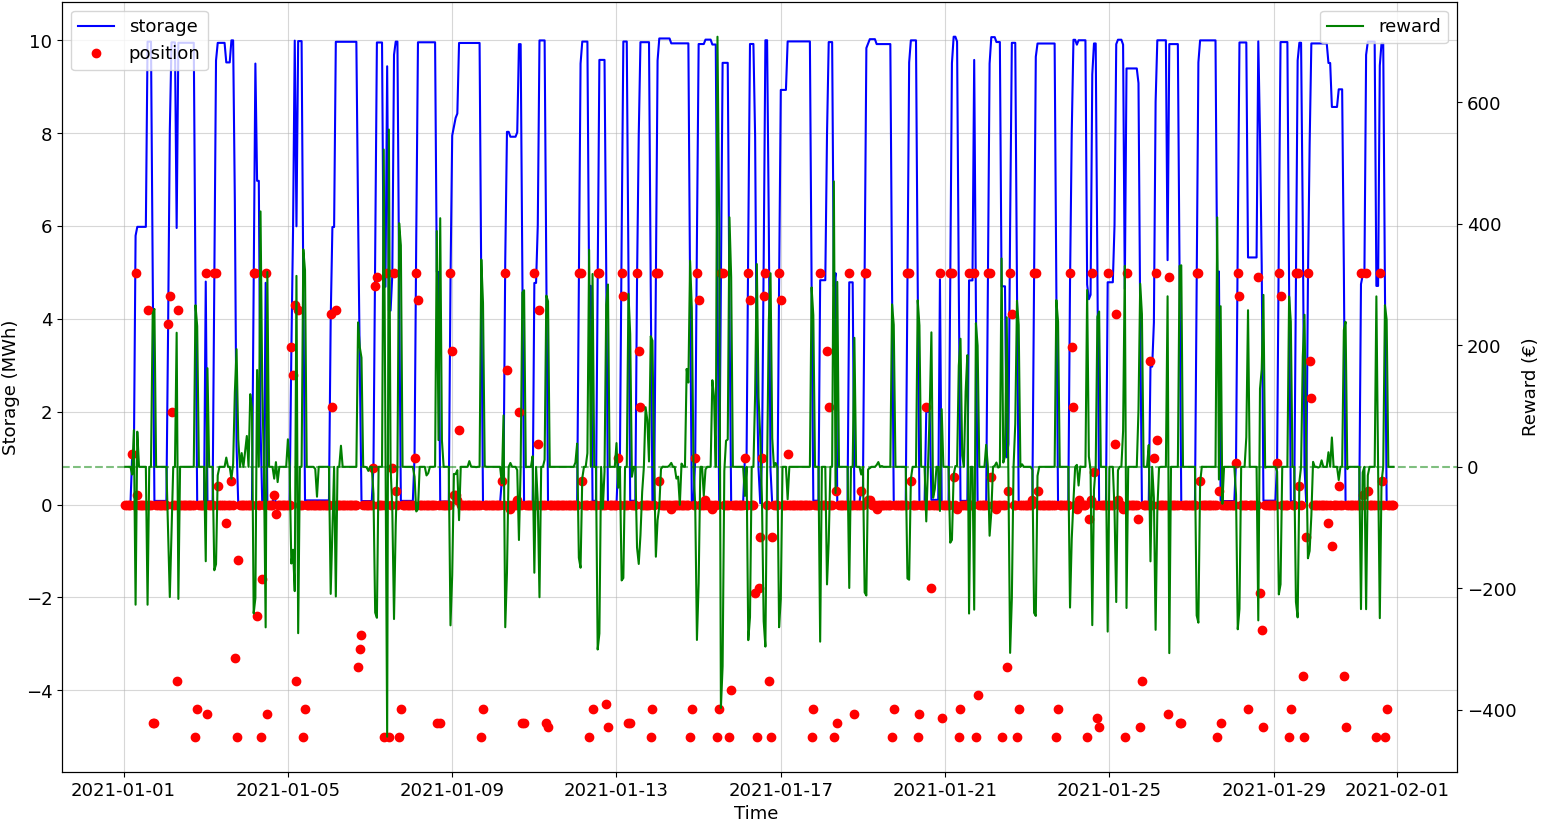

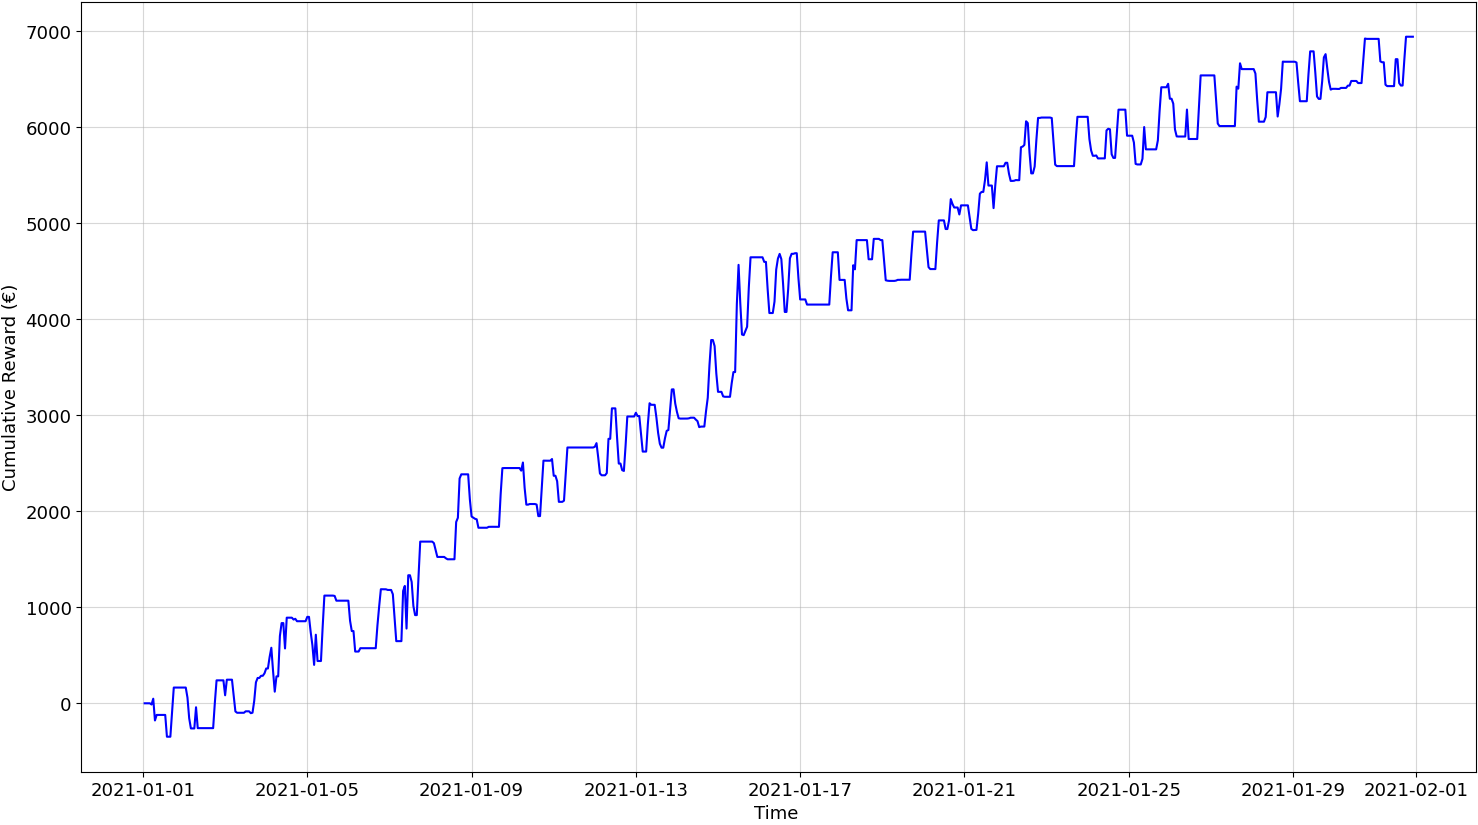

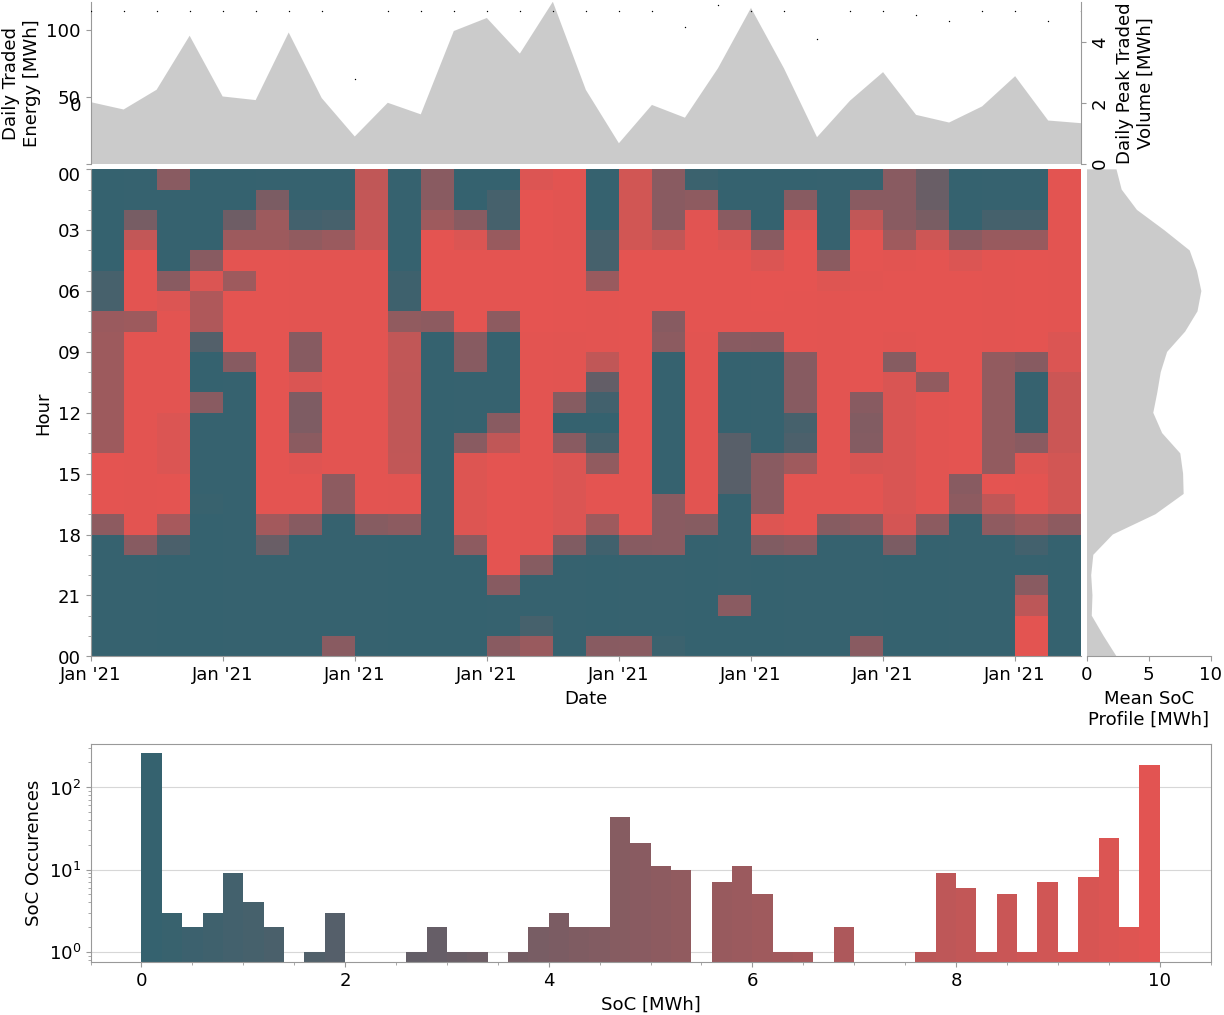

In [5]:
results = bite.Results(logs)

# display(logs["decision_record"])
# display(logs["price_record"])
# display(logs["accepted_orders"])
# display(logs["executed_orders"])
# display(logs["forecast_orders"])
# display(logs["killed_orders"])
# display(logs["balancing_orders"])

print("Total Reward (incl. deg. costs)", results.get_total_reward(), "€.")
results.plot_decision_chart(0,-1)
results.plot_heatmap()

### use forecasts

In [6]:
params = {
    "storage_max": 10.0, # MWh
    "lin_deg_cost": 4.0, # €/MWh
    "loss_in": 0.95, # injection loss
    "loss_out": 0.95, # withdrawal loss
    "trading_fee": 0.09, # €/MWh
    "num_stor_states": 11,
    "tec_delay": 0, # ms
    "fixed_solve_time": 0, # ms
    "solve_frequency": 1.0, # min
    "withdraw_max": 5.0, # MW, withdrawal from the battery, we sell
    "inject_max": 5.0, # MW, injection into the battery, we buy
    "forecast_horizon_start": 10 * 60, # min
    "forecast_horizon_end": 75, # min
}

# print all attributes of bite
# print(dir(bite))

start_date = pd.Timestamp("2021-01-01 00:00:00", tz="Europe/Berlin")
end_date = pd.Timestamp("2021-01-08 00:00:00", tz="Europe/Berlin")

sim = bite.Simulation(start_date, end_date, **params)
sim.print_parameters()

Start Time (UTC): 2020-12-31 23:00:00+00:00
End Time (UTC): 2021-01-07 23:00:00+00:00
Storage Maximum: 10.0 MWh
Linear Degredation Cost: 4.0 €/MWh
Injection Loss η+: 0.95
Withdrawal Loss η-: 0.95
Trading Fee: 0.09 €/MWh
Number of DP Storage States: 11
Technical Delay: 0 ms
Fixed Solve Time: 0 ms
Solve Frequency: 1.0 min
Injection Maximum: 5.0 MW
Withdrawal Maximum: 5.0 MW
Forecast Horizon Start: 600 min
Forecast Horizon End: 75 min


In [7]:
fc_df = pd.read_csv("/Users/schaudav/Downloads/edit_fc_map_2023_2024_dayahead_naive.csv")
# rename columns
fc_df = fc_df.rename(columns={"delivery_start_utc": "delivery_start", "forecast_creation_utc": "creation_time", "forecast_sell": "buy_price", "forecast_buy": "sell_price"})
fc_df["creation_time"] = pd.to_datetime(fc_df["creation_time"]).dt.tz_localize("UTC")
fc_df["delivery_start"] = pd.to_datetime(fc_df["delivery_start"]).dt.tz_localize("UTC")
display(fc_df)

sim.add_forecast_from_df(fc_df)

ob_path = "/Users/schaudav/Library/CloudStorage/Dropbox/project_1/intranight/data/singleDays/bins_brandNew_utc/"
sim.run(ob_path, verbose=True)

logs = sim.get_logs()

,creation_time,delivery_start,buy_price,sell_price
0,2020-12-31 14:00:00+00:00,2020-12-31 23:00:00+00:00,-5.17,-5.17
1,2020-12-31 14:00:00+00:00,2021-01-01 00:00:00+00:00,-1.07,-1.07
2,2020-12-31 14:00:00+00:00,2021-01-01 01:00:00+00:00,-1.47,-1.47
3,2020-12-31 14:00:00+00:00,2021-01-01 02:00:00+00:00,-5.08,-5.08
4,2020-12-31 14:00:00+00:00,2021-01-01 03:00:00+00:00,-4.49,-4.49
...,...,...,...,...
8755,2021-12-30 14:00:00+00:00,2021-12-31 18:00:00+00:00,9.00,9.00
8756,2021-12-30 14:00:00+00:00,2021-12-31 19:00:00+00:00,7.95,7.95
8757,2021-12-30 14:00:00+00:00,2021-12-31 20:00:00+00:00,6.00,6.00
8758,2021-12-30 14:00:00+00:00,2021-12-31 21:00:00+00:00,10.68,10.68


The simulation will iterate over 8 files.


Currently simulating orderbook_2021-01-07.bin ... : 100%|██████████████████████████████████| 8/8 [00:07<00:00,  1.10%/s]

Simulation finished.


Total Reward (incl. deg. costs) 960.7 €.


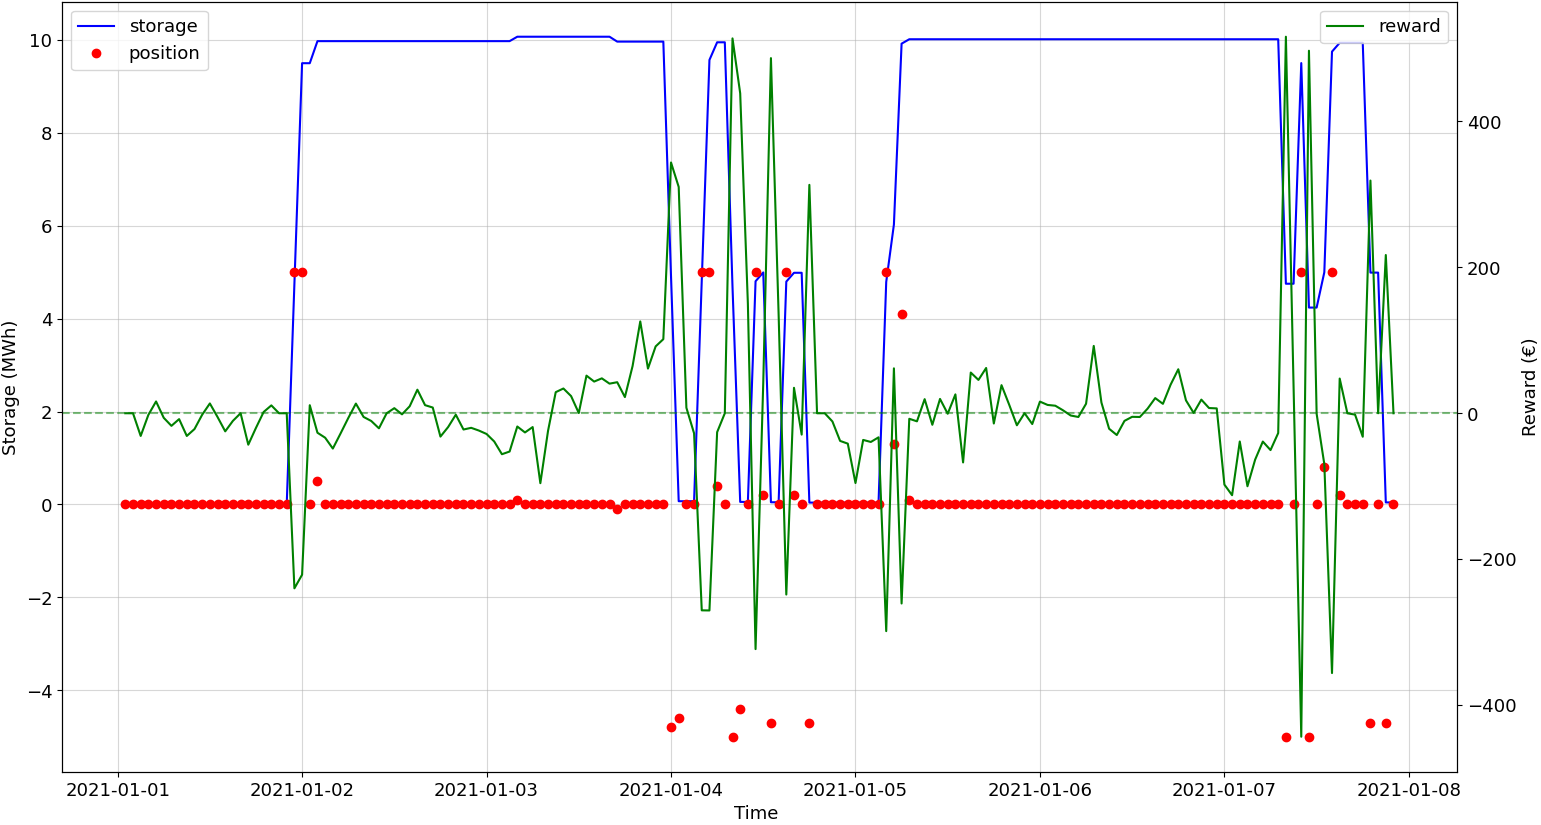

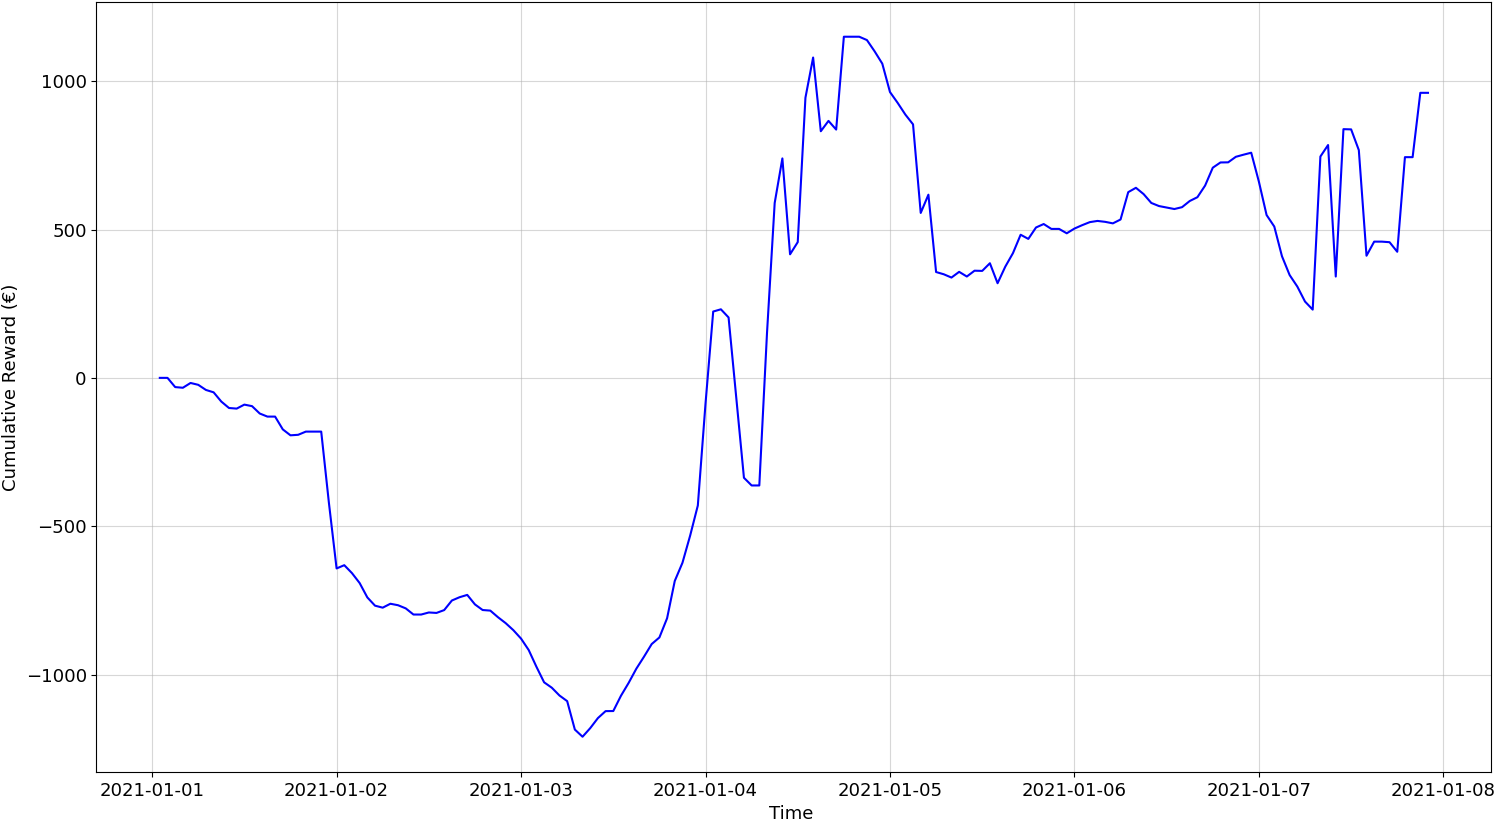

In [8]:
results = bite.Results(logs)
print("Total Reward (incl. deg. costs)", results.get_total_reward(), "€.")
results.plot_decision_chart(0,-1)

In [10]:
dec_chart = logs["decision_record"]
display(dec_chart)

,hour,storage,position,real_reward,real_reward_no_deg
hour,,,,,
2021-01-01 02:00:00+00:00,2021-01-01 02:00:00+00:00,0.00000,0.0,0.000,0.000
2021-01-01 03:00:00+00:00,2021-01-01 03:00:00+00:00,0.00000,0.0,0.000,0.000
2021-01-01 04:00:00+00:00,2021-01-01 04:00:00+00:00,0.00000,0.0,0.000,0.000
2021-01-01 05:00:00+00:00,2021-01-01 05:00:00+00:00,-4.73684,-4.5,150.548,186.548
2021-01-01 06:00:00+00:00,2021-01-01 06:00:00+00:00,-9.26316,-4.3,146.643,181.043
...,...,...,...,...,...
2021-01-07 19:00:00+00:00,2021-01-07 19:00:00+00:00,-45.47369,0.0,0.000,0.000
2021-01-07 20:00:00+00:00,2021-01-07 20:00:00+00:00,-45.47369,0.0,0.000,0.000
2021-01-07 21:00:00+00:00,2021-01-07 21:00:00+00:00,-45.47369,0.0,0.000,0.000
